In [17]:
from __future__ import division

from sympy import *
init_printing(use_unicode=True)

In [18]:
Il, Ir, I0 = symbols("I_l I_r I0", real=True)
Ml, Cl = symbols("M_l C_l", positive=True)
Mr, Cr = symbols("M_r C_r", positive=True)
R0, Rload, Rg, L0, С0 = symbols("R0 R_{load} R_g L0 С0", positive=True)
omega, omega0, omegal, omegar = symbols("\\omega \\omega_0 \\omega_l \\omega_r", positive=True)
Csum0, Csuml, Csumr = symbols("C_{\\Sigma0} C_{{\\Sigma}l} C_{{\\Sigma}r}", positive=True)
Q0, Ql, Qr, Ll, Lr, Rl, Rr = symbols("Q0 Q_l Q_r L_l L_r R_l R_r", positive=True)
chig, chiload, chiw = symbols("\\chi_g \\chi_{load} \\chi_w", positive=True)
Kel, Ker, Khl, Khr = symbols("K^e_l K^e_r K^h_l K^h_r", positive=True)
f, f0, fl, fr = symbols("f f0 f_l f_r", positive=True)
Xl, Xr, X0 = symbols("X_l X_r X0", real=True)
Pg, phi = symbols("P_g \\varphi", positive=True)
U, Z0, Z0n = symbols("U Z0 Z^N_0", real=True)
mw, Lw, Csumw, fw, Qw = symbols("m_w L_w C_{{\\Sigma}w} f_w Q_w", positive=True)
Zw, gamma, Iw, Xw = symbols("Z_w \\gamma I_w X_w", real=True)

![Two sections](./static/Diagram3.png)

Equation in generalized form

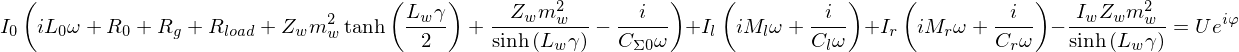

In [19]:
equation = Eq((I*omega*Ml - 1/(I*omega*Cl))*Il+(R0+Rload+Rg+I*omega*L0+1/(I*omega*Csum0)+mw**2*Zw*tanh(gamma*Lw/2)+mw**2*Zw/sinh(gamma*Lw))*I0+(I*omega*Mr - 1/(I*omega*Cr))*Ir-(Zw*mw**2/sinh(gamma*Lw))*Iw, U*exp(I*phi))
equation

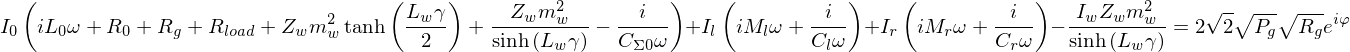

In [20]:
substitute = {U: 2*sqrt(2*Pg*Rg)}
equation = equation.subs(substitute)
equation

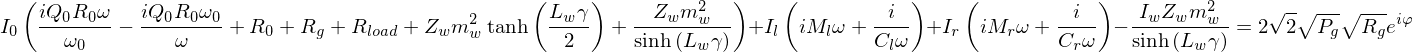

In [21]:
substitute = {L0: R0*Q0/omega0}
equation = equation.subs(substitute)
substitute = {Csum0: 1/(omega0*Q0*R0)}
equation = equation.subs(substitute)
equation

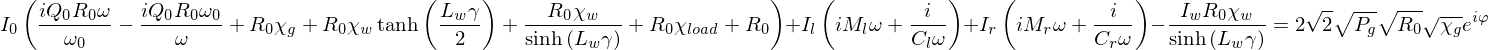

In [22]:
substitute = {Rg: R0*chig}
equation = equation.subs(substitute)
substitute = {Rload: R0*chiload}
equation = equation.subs(substitute)
substitute = {Zw: chiw*R0/mw**2}
equation = equation.subs(substitute)
equation

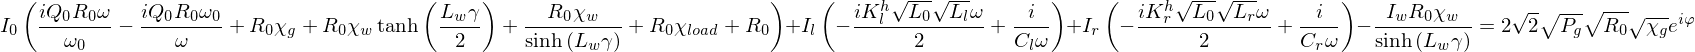

In [23]:
substitute = {Mr: -Khr*sqrt(L0)*sqrt(Lr)/2}
equation = equation.subs(substitute)
substitute = {Ml: -Khl*sqrt(L0)*sqrt(Ll)/2}
equation = equation.subs(substitute)
equation

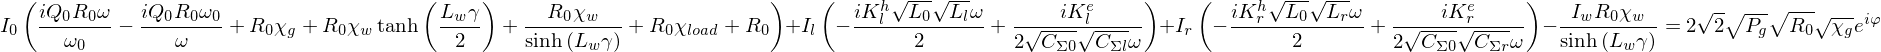

In [24]:
substitute = {Cr: 2*sqrt(Csum0)*sqrt(Csumr)/Ker}
equation = equation.subs(substitute)
substitute = {Cl: 2*sqrt(Csum0)*sqrt(Csuml)/Kel}
equation = equation.subs(substitute)
equation

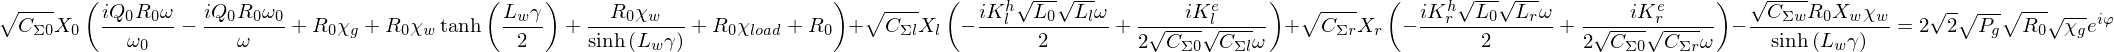

In [25]:
substitute = {Il: Xl*sqrt(Csuml)}
equation = equation.subs(substitute)
substitute = {Ir: Xr*sqrt(Csumr)}
equation = equation.subs(substitute)
substitute = {I0: X0*sqrt(Csum0)}
equation = equation.subs(substitute)
substitute = {Iw: Xw*sqrt(Csumw)}
equation = equation.subs(substitute)
equation

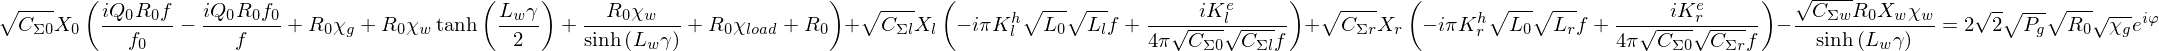

In [26]:
substitute = {omega: 2*pi*f}
equation = equation.subs(substitute)
substitute = {omegar: 2*pi*fr}
equation = equation.subs(substitute)
substitute = {omegal: 2*pi*fl}
equation = equation.subs(substitute)
substitute = {omega0: 2*pi*f0}
equation = equation.subs(substitute)
equation

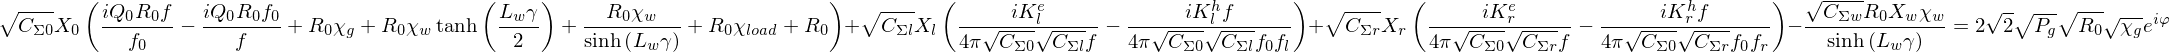

In [27]:
substitute = solve(Eq(1/(2*pi*sqrt(L0)*sqrt(Csum0)), f0), L0, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(1/(2*pi*sqrt(Ll)*sqrt(Csuml)), fl), Ll, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(1/(2*pi*sqrt(Lr)*sqrt(Csumr)), fr), Lr, dict=1)[0]
equation = equation.subs(substitute)
equation

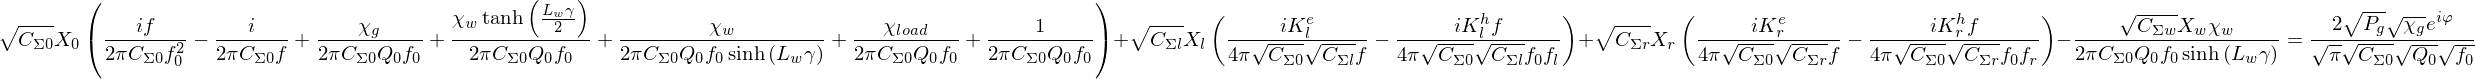

In [28]:
substitute = {R0: 1/(Q0*2*pi*f0*Csum0)}
equation = equation.subs(substitute)
equation

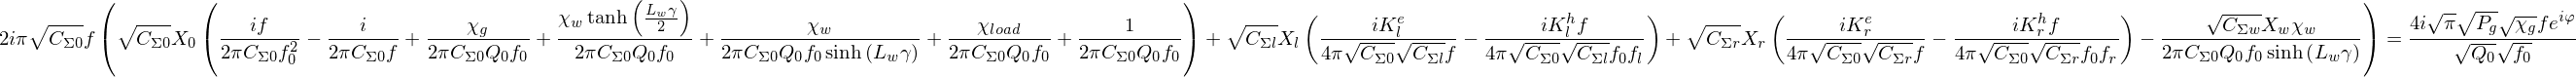

In [29]:
equation = Eq(equation.lhs*sqrt(Csum0)*2*pi*f*I, equation.rhs*sqrt(Csum0)*2*pi*f*I)
equation

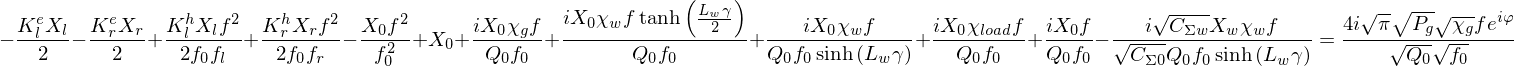

In [30]:
equation = Eq(expand(equation.lhs), equation.rhs)
equation

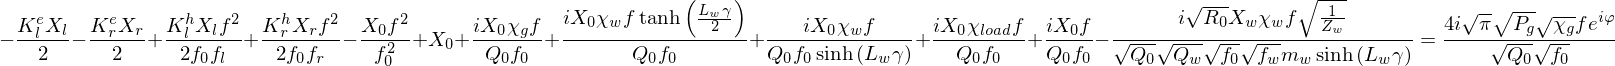

In [31]:
substitute = {Csum0: 1/(Q0*2*pi*f0*R0)}
equation = equation.subs(substitute)
substitute = {Csumw: 1/(Qw*2*pi*fw*Zw*mw**2)}
equation = equation.subs(substitute)
equation

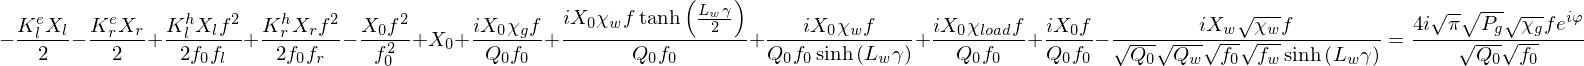

In [32]:
substitute = {Zw: R0*chiw/mw**2}
equation = equation.subs(substitute)
equation